<a href="https://colab.research.google.com/github/melliejelly/newrepo/blob/main/PUSD_SpEd_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

According to an [article](https://www.pasadenanow.com/main/pasadena-teachers-union-members-rally-at-city-hall) posted in November 2023, Pasadena Teachers Union Members rallied at City Hall, advocating for salary increases and improvement in working conditions, particularly for Special Education teachers. The United Teachers of Pasadena (UTP) president Jonathan Gardner made the claim that their teachers are not being compensated as much as comparable school districts in the surrounding area. This analysis will investigate Gardner's claims with a focus on the salaries of Special Education professionals.





**Part 1: Comparison of the average of Special Education salaries in Pasadena USD vs. the average of Special Education salaries of neighboring school districts**

In [ ]:
# import relevant libraries
import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [ ]:
# mount google Drive to access CSVs
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# upload csv tables of Pasadena Unified School District (PUSD) & surrounding district salaries
base_dir = "drive/MyDrive/USD_salary/"
for f in range(len(os.listdir(base_dir))):
  if f == 0:
    salary_data = pd.read_csv(os.path.join(base_dir, os.listdir(base_dir)[f]))
  else:
    salary_data = pd.concat([salary_data, pd.read_csv(os.path.join(base_dir, os.listdir(base_dir)[f]))])

salary_data

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
0,Brian O. Mc Donald,Superintendent,282048.28,0.0,21885.88,104669.49,303934.16,408603.65,2022,NaN,Pasadena Unified,NaN
1,Leslie Ann Barnes,Chief Finance/Operats Off,228975.10,0.0,30555.81,84572.52,259530.91,344103.43,2022,NaN,Pasadena Unified,NaN
2,Kingsley C Udo,Interim Chief Business Of,149040.00,0.0,76053.49,57992.78,225093.49,283086.27,2022,NaN,Pasadena Unified,NaN
3,Tendaji Kareem Jamal,Chief Info Tech Officer,198142.39,0.0,7145.28,75357.40,205287.67,280645.07,2022,NaN,Pasadena Unified,NaN
4,Elizabeth J. Blanco,Interim Superintendent,204272.55,0.0,24447.12,45129.65,228719.67,273849.32,2022,NaN,Pasadena Unified,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
753,Nancy Lynne Bulgin,Teacher,0.00,0.0,0.00,0.00,0.00,0.00,2021,NaN,Temple City Unified,NaN
754,Rebecca Jean Koenig,Summer Teacher-Hrly Inst.,0.00,0.0,0.00,0.00,0.00,0.00,2021,NaN,Temple City Unified,NaN
755,Dan A Ferguson,Teacher,0.00,0.0,0.00,0.00,0.00,0.00,2021,NaN,Temple City Unified,NaN
756,Wenni Lam Seidell,Teacher,0.00,0.0,0.00,0.00,0.00,0.00,2021,NaN,Temple City Unified,NaN


In [ ]:
# make sure all the school districts of interest are in the dataset
districts = salary_data.groupby(by='Agency').count()["Employee Name"]
districts

Agency
Arcadia Unified            1524
Azusa Unified              1530
Duarte Unified              716
Glendale Unified           4146
La Canada Unified           665
Los Angeles Unified       97593
Monrovia Unified            985
Pasadena Unified           3000
San Gabriel Unified         870
San Marino Unified          484
South Pasadena Unified      799
Temple City Unified         758
Name: Employee Name, dtype: int64

The claim that Pasadena educators are not being compensated similarly to other school districts was based on a comparison between Pasadena and "the closest ten comparable school districts in terms of size and location".  All of the districts included in the dataset are directly neighboring Pasadena School District, so we will assume their locations are all equally close. The article did not specify which districts, so we will narrow our analysis to the 10 school districts that are closest to Pasadena in size. Although number of students is probably a better measure of size, in this analysis, we will use the number of employees as our measure.

In [ ]:
# determine which 10 school districts are closest to PUSD in size
pasadena_count = districts['Pasadena Unified']
PUSD_size_comp = abs(districts - pasadena_count).rename('PUSD compare')
districts_w_comp = pd.concat([districts, PUSD_size_comp],axis=1)
close_districts = districts_w_comp.sort_values(by='PUSD compare').iloc[:11, 0].index
close_districts_list = close_districts.tolist()
close_districts_list

['Pasadena Unified',
 'Glendale Unified',
 'Azusa Unified',
 'Arcadia Unified',
 'Monrovia Unified',
 'San Gabriel Unified',
 'South Pasadena Unified',
 'Temple City Unified',
 'Duarte Unified',
 'La Canada Unified',
 'San Marino Unified']

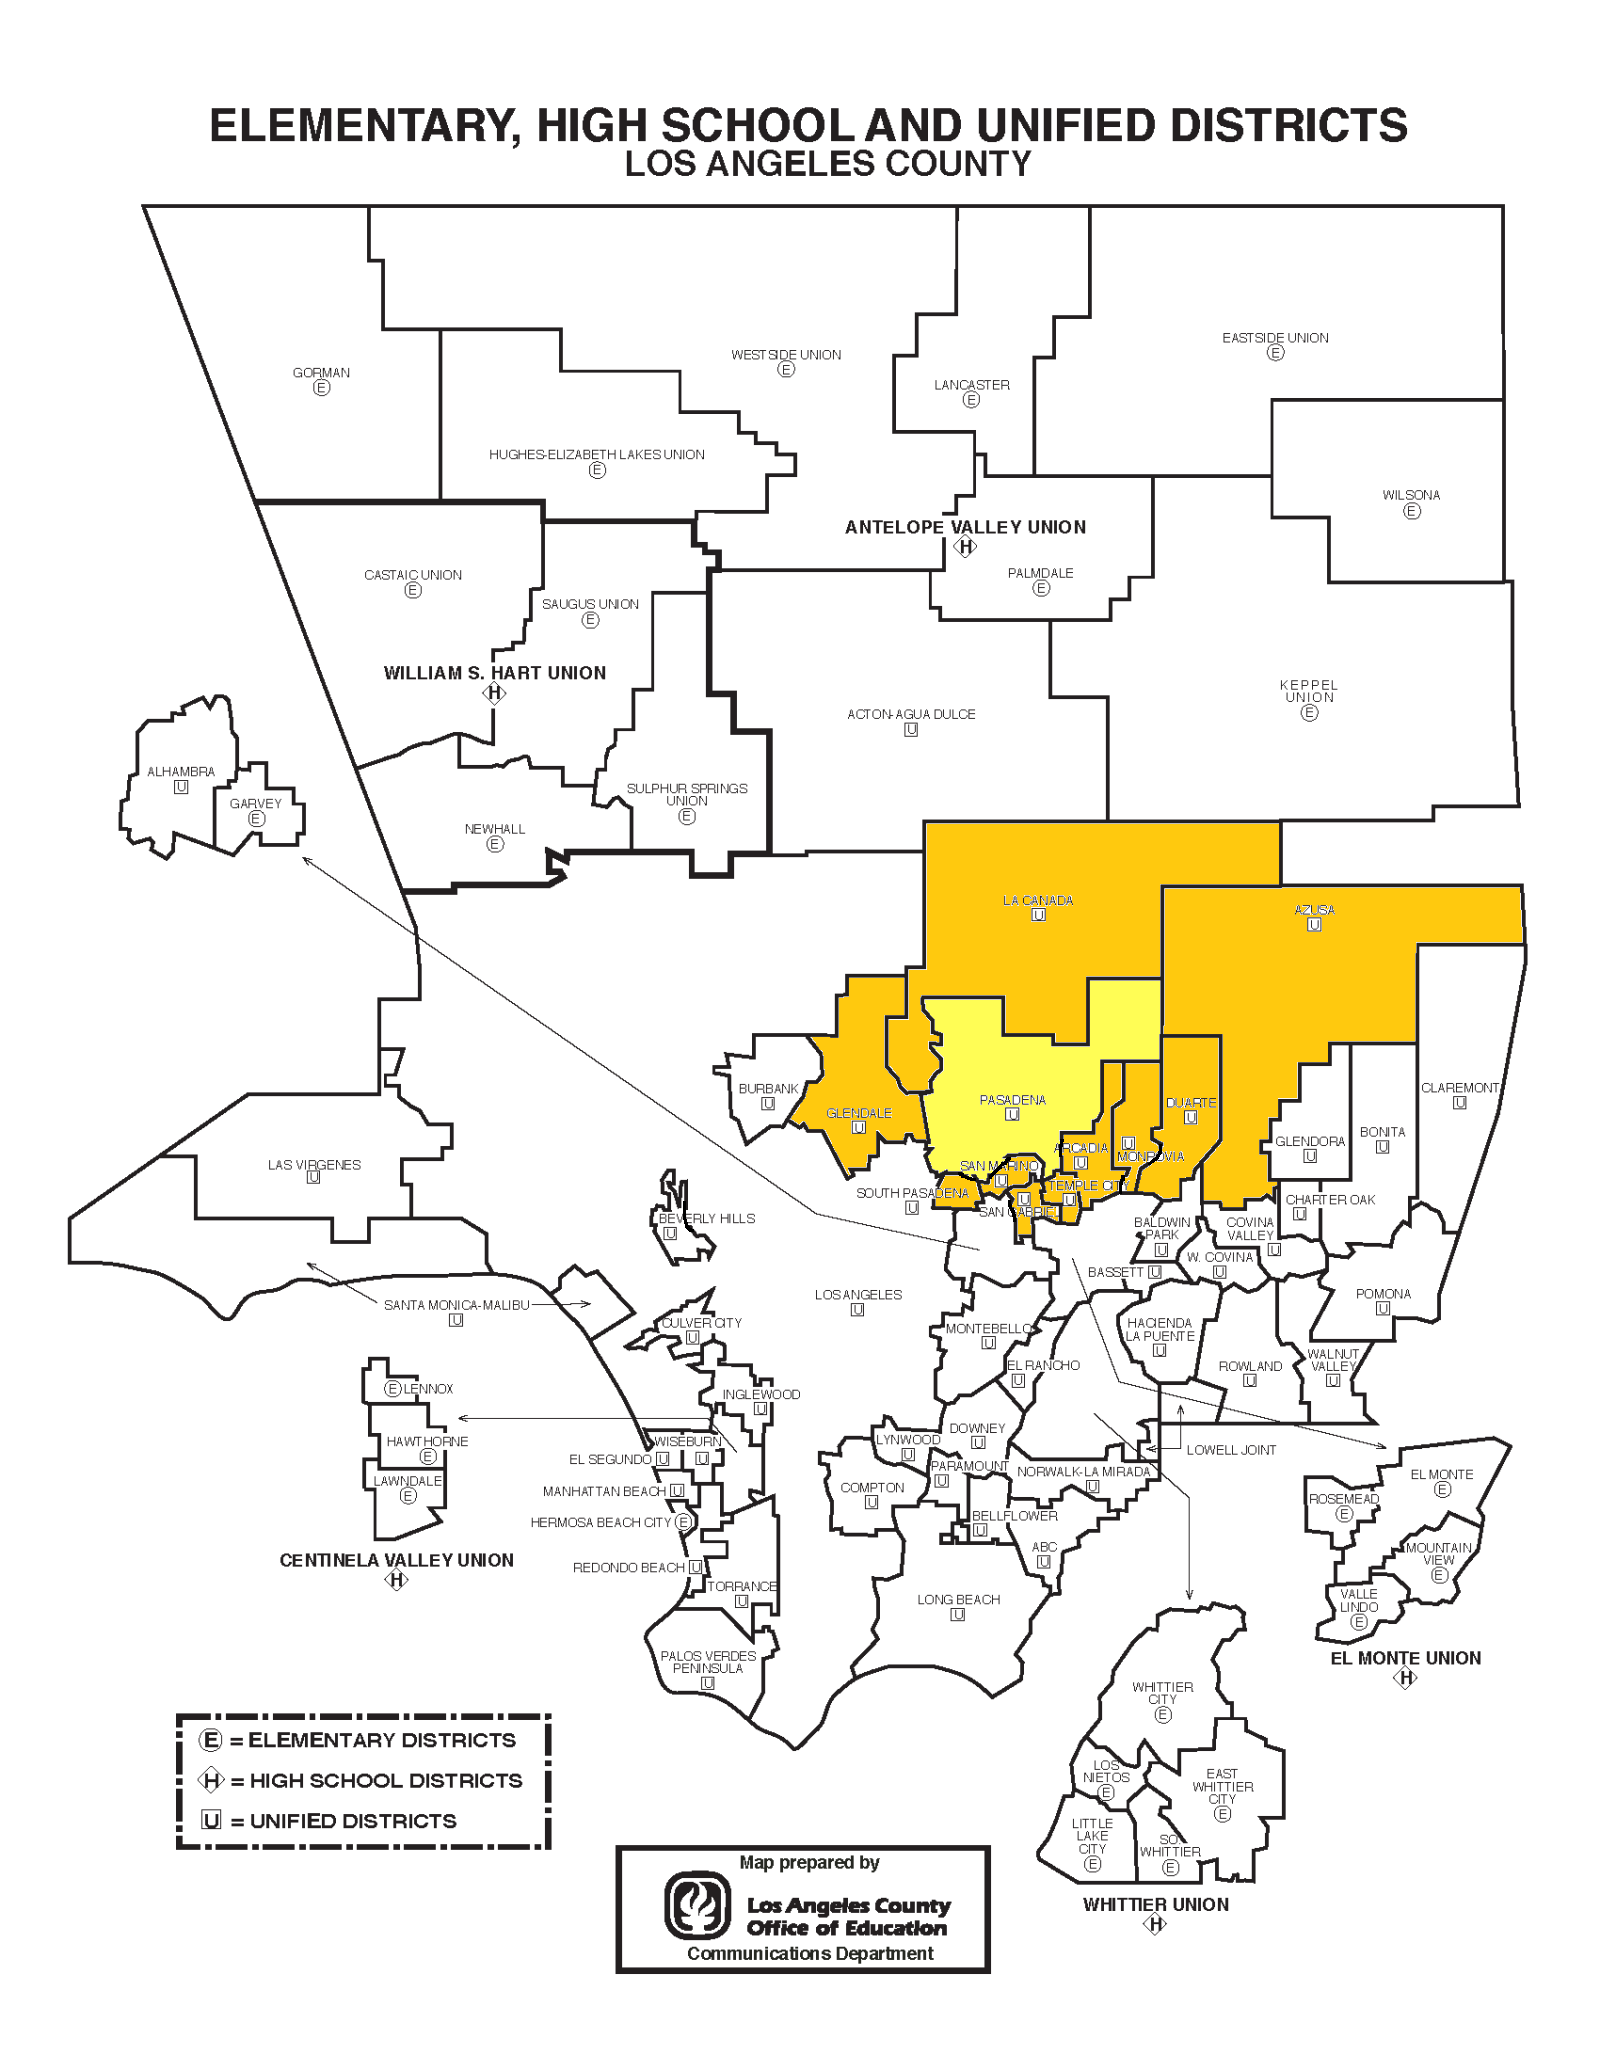

Now, we will limit our dataset to PUSD and the 10 school districts that were determined to be closest to PUSD in size.

In [ ]:
salary_data = salary_data.loc[salary_data.Agency.isin(close_districts_list)]

For our analysis, we will look at data on 'Total Pay' and we will also be using the most recent dataset for each school district, which varied between 2022 and 2021. Future analysis can investigate the differences in pay with benefits in consideration and can also investigate whether or not year had an impact on differences in salaries.

In [ ]:
# remove irrelevant columns.
salary_data = salary_data.drop(columns=['Employee Name', 'Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Notes', 'Status','Total Pay & Benefits', 'Year'])
salary_data

,Job Title,Total Pay,Agency
0,Superintendent,303934.16,Pasadena Unified
1,Chief Finance/Operats Off,259530.91,Pasadena Unified
2,Interim Chief Business Of,225093.49,Pasadena Unified
3,Chief Info Tech Officer,205287.67,Pasadena Unified
4,Interim Superintendent,228719.67,Pasadena Unified
...,...,...,...
753,Teacher,0.00,Temple City Unified
754,Summer Teacher-Hrly Inst.,0.00,Temple City Unified
755,Teacher,0.00,Temple City Unified
756,Teacher,0.00,Temple City Unified


We will also limit our dataset to include only the salaries of individuals who work on a Special Education team, including: Special Education teachers, psychologists, speech-language pathologists, resource teachers, occupational therapists, and others.

First, we will create a list of all the different variations of job titles for the various jobs in Special Education. For example, we notice that although Speech-Language Pathologist is the same as a Language, Speech, and Hearing Specialist, they are registered under a different name depending on the district. We want to make sure that we include as many of these variations as possible in our dataset.

In [ ]:
# note the different ways of saying "Speech-Language Pathologist" and "Speech-Language Pathologist Assistant" in the data set

salary_data[salary_data['Job Title'].str.contains('Speech')].groupby(by='Job Title').count()['Agency']

Job Title
Lang,Speech,Hearing Spec.                23
Speech & Lang Pathologist                11
Speech & Lang. Path. Asst                 2
Speech Lang Path Asst                     2
Speech Lang Patholog Asst                 3
Speech Lang. Path. Assist                 4
Speech Language Pathologist              13
Speech Language Pathologist Assistant     1
Speech Pathologist                        9
Speech-Lang Path Assist                  14
Name: Agency, dtype: int64

Based on domain-knowledge, we know that the major players on the Special Education team include: Psychologist, Special Day Class (SDC) Teacher, Speech-Language Pathologist (SLP), Occupational Therapist (OT), Resource Specialist (RSP) Teacher, and Behavior Specialists. We will search for variations of these terms and the jobs related to those fields (e.g. "SLP Aide").

In [ ]:
# create an array of title variations for each profession

psych = salary_data[salary_data['Job Title'].str.contains('Psych')].groupby('Job Title').count().index.tolist()

rsp_teacher = salary_data[salary_data['Job Title'].str.contains('Rsp')].groupby('Job Title').count().index.tolist()
other_rsp_names = ['Resource Specialist', 'Resource Teacher']
rsp = rsp_teacher + other_rsp_names

sdc_teacher = salary_data[salary_data['Job Title'].str.contains('Sdc')].groupby('Job Title').count().index.tolist()
other_sdc_names = salary_data[salary_data['Job Title'].str.contains('Spec Ed')].groupby('Job Title').count().index.tolist()
even_more_sdc_names = salary_data[salary_data['Job Title'].str.contains('Special Ed')].groupby('Job Title').count().index.tolist()
sdc = sdc_teacher + other_sdc_names + even_more_sdc_names

slp = salary_data[salary_data['Job Title'].str.contains('Speech')].groupby('Job Title').count().index.tolist()

ot = salary_data[salary_data['Job Title'].str.contains('Occ')].groupby('Job Title').count().index.tolist()

behavior = salary_data[salary_data['Job Title'].str.contains('Behav')].groupby('Job Title').count().index.tolist()

# now we will combine all the arrays of the job title variations
SpEd_profs = [psych, rsp, sdc, slp, ot, behavior]
SpEd_jobs = []
for educator in SpEd_profs:
  SpEd_jobs += educator

SpEd_jobs

['Dist Psychologist-Bcba',
 'Floating Sch Psychologist',
 'Hourly Psychologist',
 'Lead Psychologist',
 'Psych Intern',
 'Psych Intern Unclassified',
 'Psychological Ser Providr',
 'Psychologist',
 'School Psychologist',
 'Ss Psychologist',
 'Rsp Tchr / Ind',
 'Rsp Teacher',
 'Teacher - Rsp',
 'Teacher, Rsp-Eh Spec Ed',
 'Resource Specialist',
 'Resource Teacher',
 'Sdc Teacher',
 'Summer School Sdc Aide',
 'Teacher - Sdc',
 'Teacher, Sdc Spec Ed',
 'I A Spec Ed I',
 'I A-One On One-Spec Ed',
 'Inst Aide/Spec Ed',
 'Instr Aide- Spec Educ',
 'Program Admin, Spec Ed',
 'Spec Ed Teacher',
 'Sub I/A-Spec Ed',
 'Sumr Sch Spec Ed Teacher',
 'Teacher, Rsp-Eh Spec Ed',
 'Teacher, Sdc Spec Ed',
 'Coord I Special Ed',
 'Coord I,Special Education',
 'Coord Iii, Special Ed.',
 'Dir, Special Education',
 'Director - Special Educ',
 'Director Of Special Ed',
 'Director Of Special Ed.',
 'Director Of Special Educ',
 'Director Of Special Education',
 'Director, Special Ed',
 'Exec Dir, Special Ed',
 '

After looking through the list of title variations for Special Education professionals, we notice that the list includes administration jobs. We need to remove those individuals from the list since our analysis is only concerned with professionals who directly work with the students.

In [ ]:
# create a list of all the names of admin positions in our Special Ed list
admin_jobs = []
admin = ['Dir', 'Coord']
for job in SpEd_jobs:
  for admin_name in admin:
    if admin_name in job:
      admin_jobs.append(job)

# create a new Special Ed list with admin positions removed
edited_SpEd_jobs = []
for job in SpEd_jobs:
  if job not in admin_jobs:
    edited_SpEd_jobs.append(job)

edited_SpEd_jobs

['Dist Psychologist-Bcba',
 'Floating Sch Psychologist',
 'Hourly Psychologist',
 'Lead Psychologist',
 'Psych Intern',
 'Psych Intern Unclassified',
 'Psychological Ser Providr',
 'Psychologist',
 'School Psychologist',
 'Ss Psychologist',
 'Rsp Tchr / Ind',
 'Rsp Teacher',
 'Teacher - Rsp',
 'Teacher, Rsp-Eh Spec Ed',
 'Resource Specialist',
 'Resource Teacher',
 'Sdc Teacher',
 'Summer School Sdc Aide',
 'Teacher - Sdc',
 'Teacher, Sdc Spec Ed',
 'I A Spec Ed I',
 'I A-One On One-Spec Ed',
 'Inst Aide/Spec Ed',
 'Instr Aide- Spec Educ',
 'Program Admin, Spec Ed',
 'Spec Ed Teacher',
 'Sub I/A-Spec Ed',
 'Sumr Sch Spec Ed Teacher',
 'Teacher, Rsp-Eh Spec Ed',
 'Teacher, Sdc Spec Ed',
 'Inst Aide Special Ed 1:1',
 'Inst Aide-Special Educ',
 'Inst Aide/Special Ed./I',
 'Inst Asst Iii-Special Ed',
 'Inst Asst Iv-Special Ed',
 'Inst Asst/Special Ed',
 'Inst.Aide Special Ed./Ii',
 'Inst.Aide Special Ed./Iii',
 'Instr Asst-Special Ed',
 'Instructional Assistant - Special Education',
 'Inst

In [ ]:
sped_salary_data = salary_data[salary_data['Job Title'].isin(edited_SpEd_jobs)]
sped_salary_data

,Job Title,Total Pay,Agency
72,Psychologist,125345.13,Pasadena Unified
74,Psychologist,130070.13,Pasadena Unified
87,Teacher-Special Ed,122838.87,Pasadena Unified
94,Resource Teacher,121998.66,Pasadena Unified
118,Psychologist,116580.12,Pasadena Unified
...,...,...,...
511,Behavior Intrv Aide,23071.59,Temple City Unified
557,Occupational Therapist,12649.10,Temple City Unified
627,Behavior Intrv Aide,5143.50,Temple City Unified
645,Behavior Intrv Aide,3738.00,Temple City Unified


In this analysis, we will be performing an A/B test with our A group as 'Pasadena' and our B group as 'Not Pasadena'. Let's create a new column with these labels.  

In [ ]:
# create a function that labels whether or not the district is Pasadena
def is_Pasadena(name):
  if name == 'Pasadena Unified':
    return True
  else:
    return False

# create a Series with is_Pasadena labels
pasadena_labels = sped_salary_data['Agency'].apply(is_Pasadena).rename("is_PUSD")

# add is_Pasadena labels to sped_salary_higher_min_wage
sped_salary_data = pd.concat([sped_salary_data, pasadena_labels], axis = 1)
sped_salary_data

,Job Title,Total Pay,Agency,is_PUSD
72,Psychologist,125345.13,Pasadena Unified,True
74,Psychologist,130070.13,Pasadena Unified,True
87,Teacher-Special Ed,122838.87,Pasadena Unified,True
94,Resource Teacher,121998.66,Pasadena Unified,True
118,Psychologist,116580.12,Pasadena Unified,True
...,...,...,...,...
511,Behavior Intrv Aide,23071.59,Temple City Unified,False
557,Occupational Therapist,12649.10,Temple City Unified,False
627,Behavior Intrv Aide,5143.50,Temple City Unified,False
645,Behavior Intrv Aide,3738.00,Temple City Unified,False


Looking through the Total Pay column in our dataset of Special Education salaries, we see that the minimum pay is \$0. We will try to limit our dataset to only include those who worked full time. Minimum wage in California in the year 2021 was \$14. Let's determine what is the minimum salary that we will include in our dataset then remove any salaries lower than that minimum.

In [ ]:
min_wage = 14
hours_per_week = 40
weeks_per_year = 52
min_salary = min_wage * hours_per_week * weeks_per_year

sped_salary_above_min_wage = sped_salary_data[sped_salary_data['Total Pay'] >= min_salary]
sped_salary_above_min_wage

,Job Title,Total Pay,Agency,is_PUSD
72,Psychologist,125345.13,Pasadena Unified,True
74,Psychologist,130070.13,Pasadena Unified,True
87,Teacher-Special Ed,122838.87,Pasadena Unified,True
94,Resource Teacher,121998.66,Pasadena Unified,True
118,Psychologist,116580.12,Pasadena Unified,True
...,...,...,...,...
446,Behavior Intrv Aide,30482.12,Temple City Unified,False
449,Behavior Intrv Aide,30075.85,Temple City Unified,False
450,Behavior Intrv Aide,29926.58,Temple City Unified,False
453,Behavior Intrv Aide,29979.52,Temple City Unified,False


Now, after organizing the data, let's perform A/B testing and see if Pasadena special education teachers are being paid significantly less on average than special education teachers in other school districts. We will be testing the following hypotheses:
* Null: Special Educators in PUSD get paid as much on average as the Special Educators in the neighboring school districts.
* Alternate: Special Educators in PUSD get paid less on average than the Special Educators in the neighboring school districts.

First, let's see what the observed difference in total pay between Pasadena and Not Pasadena school districts.

In [ ]:
## function that performs A/B testing
#param: table, pay column, agency

def difference_of_means(table, pay_label, group_label):
  '''Takes: name of DataFrame, column label for pay, column label for group
  Returns: difference of means of two groups'''

  # dataframe with the two relevant columns
  reduced = table[[pay_label, group_label]]

  # dataframe containing group means
  means_table = reduced.groupby(group_label).mean()
  # series of group means
  means = means_table[pay_label]

  # this returns Pasadena - Not Pasadena difference
  return means[means.index == True].values[0] - means[means.index == False].values[0]

observed_difference = difference_of_means(sped_salary_above_min_wage, 'Total Pay', 'is_PUSD')

if observed_difference < 0:
  print(f"Pasadena USD salary average is {np.round(abs(observed_difference), 2)} less than the average salary across other non-Pasadena districts.")
else:
  print(f"Pasadena USD salary average is {np.round(abs(observed_difference), 2)} more than the average salary across other non_Pasadena districts.")



Pasadena USD salary average is 854.02 more than the average salary across other non_Pasadena districts.


Based on our dataset, the observed difference goes against Pasadena USD teacher claims that Special Education professionals are being paid less than the educators in surrounding districts. However, we should determine the significance of this observed difference by conducting and A/B test with bootstrapping.

In [ ]:
# creates a function that simulates a difference in average salary

def one_simulated_difference(table, pay_label, group_label):
  """Param: name of table, column of pay label, group-label variable
  Returns: difference of means of groups after shuffling labels"""

  # array of shuffled labels
  shuffled_labels = table.sample(replace=False, frac=1)[group_label].values

  # series of the total pay salaries from original table
  pay_series = table[pay_label].values

  #create dataframe with shuffled labels
  shuffled_df = pd.DataFrame()
  shuffled_df['shuffled_labels'] = shuffled_labels
  shuffled_df['pay'] = pay_series

  return difference_of_means(shuffled_df, 'pay', 'shuffled_labels')


one_simulated_difference(sped_salary_above_min_wage, 'Total Pay', 'is_PUSD')

-263.52962335266056

Our observed difference 854.02 is plotted at the red dot.


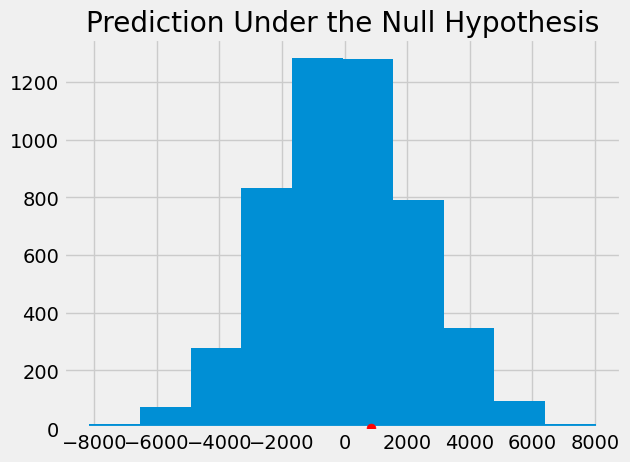

In [ ]:
# simulate 5000 times to create a distribution of simulated differences

repetitions = 5000
differences = []

for i in np.arange(repetitions):
  new_difference = one_simulated_difference(sped_salary_above_min_wage, 'Total Pay', 'is_PUSD')
  differences.append(new_difference)

diffs_df = pd.DataFrame()
diffs_df['Differences Between Group Means'] = differences
diffs_df.hist()
plots.scatter(observed_difference, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null Hypothesis');

print(f"Our observed difference {np.round(observed_difference, 2)} is plotted at the red dot.")


From our distribution, let's determine if our observed difference is statistically significant, with a p-value cut-off set at 0.05.

In [ ]:
# create a function for calculating p-value

def calc_p(sim_measures, observed, repetitions):
  '''Takes: an array of simulated measures, the observed measure,
  and the number of repetitions
  Returns: p-value'''
  return np.count_nonzero(sim_measures < observed) / repetitions

p_val = calc_p(differences, observed_difference, repetitions)
if p_val < 0.05:
  print(f'After comparing our observed p-value of {p_val} with 0.05, \nwe have determined that PUSD special ed instructors earn significantly less on average than special ed instructors in neighboring districts.')
else:
  print(f'After comparing our observed p-value of {p_val} with 0.05, \nwe are unable to reject our null hypothesis that PUSD special ed instructors earn as much on average as special ed instructors in neighboring districts ')

After comparing our observed p-value of 0.6506 with 0.05, 
we are unable to reject our null hypothesis that PUSD special ed instructors earn as much on average as special ed instructors in neighboring districts 


Our analysis suggests that contrary to the claims of Pasadena USD educators, special education instructors in Pasadena USD make more than the educators in neighboring districts on average though the result is statistically insignificant. In other words, the Special Education salaries in Pasadena USD are comparable to its neighboring districts.

**Part 2: Comparison of the average of Special Education salaries in Pasadena USD vs. the average of Special Education salaries of *each* of the neighboring school districts**

In our first analysis, we investigated whether or not special education instructors in Pasadena USD are making significantly less than instructors in non-Pasadena school districts as a whole. Our results indicate that Pasadena USD special education salaries are not significantly lower than those in neighboring districts -- in fact, contrary to what was stated, their salaries were observed to be higher than the average of non-PUSD districts (though the result was insignificant)!

Gardner claimed in the article, "compared to the closest ten comparable school districts in terms of size and location, Pasadena is second from the bottom." Based on our analysis thus far, these claims seem unlikely. However, it would be interesting to investigate which of the neighboring districts are earning significantly more and which are earning significantly less than Pasadena USD.
For example, are the special education instructors in San Marino making more than the instructors in Pasadena? What about in Azusa?

In [ ]:
# create an array of all comparable districts neighboring Pasadena
non_PUSD_districts = [x for x in close_districts if x != "Pasadena Unified"]
non_PUSD_districts

['Glendale Unified',
 'Azusa Unified',
 'Arcadia Unified',
 'Monrovia Unified',
 'San Gabriel Unified',
 'South Pasadena Unified',
 'Temple City Unified',
 'Duarte Unified',
 'La Canada Unified',
 'San Marino Unified']

In [ ]:
# get the simulated differences for each of the districts
def bootstrap_differences(dataframe, pay_column, group_label, repetitions):
  '''Takes: dataframe, name of pay column, column name w group labels, number of bootstrap reps
  Returns: list of simulated differences'''
  sim_diffs = []
  for i in np.arange(repetitions):
    sim_diff = one_simulated_difference(dataframe, pay_column, group_label)
    sim_diffs.append(sim_diff)
  return sim_diffs

# create a function to determine if data favors alternative hypothesis and its statistical significance
def accept_alternative_hyp(obs_diff, p_val):
  '''Takes: the observed difference btwn non-PUSD salary and PUSD salary and p-value
  Returns: two booleans, first stating if we accept alternative hypothesis, second stating if it's statistically significant'''
  if obs_diff < 0:
    alt_hyp = True
    if p_val < 0.05:
      statistically_significant = True
    else:
      statistically_significant = False
  else:
    alt_hyp = False
    if p_val > 0.95:
      statistically_significant = True
    else:
      statistically_significant = False
  return alt_hyp, statistically_significant



In [ ]:
# collect the statistics for each of the district comparisons w PUSD
sim_diffs_btwn_districts = {}
district_conclusions = {}

for district in non_PUSD_districts:
  # creates a dataframe with only one non-PUSD districts and PUSD
  compare_districts_df = sped_salary_above_min_wage[sped_salary_above_min_wage['Agency'].isin([district, 'Pasadena Unified'])]

  # adds to the list of observed test statistics for the non-PUSD districts
  obs_diff_btwn_districts = difference_of_means(compare_districts_df, 'Total Pay', 'is_PUSD')
  district_conclusions[f'{district}'] = [obs_diff_btwn_districts]

  # adds simulated difference values to the sim_diffs dictionary
  num_of_simulations = 5000
  one_sim_diff_in_district = bootstrap_differences(compare_districts_df, 'Total Pay', 'is_PUSD', num_of_simulations)
  sim_diffs_btwn_districts[f'{district}'] = one_sim_diff_in_district

  # adds p-values to district_p_vals dictionary
  one_district_p_val = calc_p(one_sim_diff_in_district, obs_diff_btwn_districts, repetitions)
  district_conclusions[f'{district}'] += [one_district_p_val]

  # adds alt hypothesis and stat sig decisions to district_conclusions dictionary
  one_district_alt_hyp = accept_alternative_hyp(obs_diff_btwn_districts, one_district_p_val)
  district_conclusions[f'{district}'] += [one_district_alt_hyp[0]]
  district_conclusions[f'{district}'] += [one_district_alt_hyp[1]]

district_conclusions

{'Glendale Unified': [-4089.196831336274, 0.059, True, False],
 'Azusa Unified': [-12092.092903243276, 0.001, True, True],
 'Arcadia Unified': [11814.354673152928, 0.9984, False, True],
 'Monrovia Unified': [5678.103505405008, 0.9286, False, False],
 'San Gabriel Unified': [23572.147288537548, 1.0, False, True],
 'South Pasadena Unified': [-2143.010711462455, 0.3422, True, False],
 'Temple City Unified': [21145.849658907915, 0.9998, False, True],
 'Duarte Unified': [-3624.1068653086113, 0.2204, True, False],
 'La Canada Unified': [15445.818038537545, 0.927, False, False],
 'San Marino Unified': [-7157.211267018021, 0.1564, True, False]}

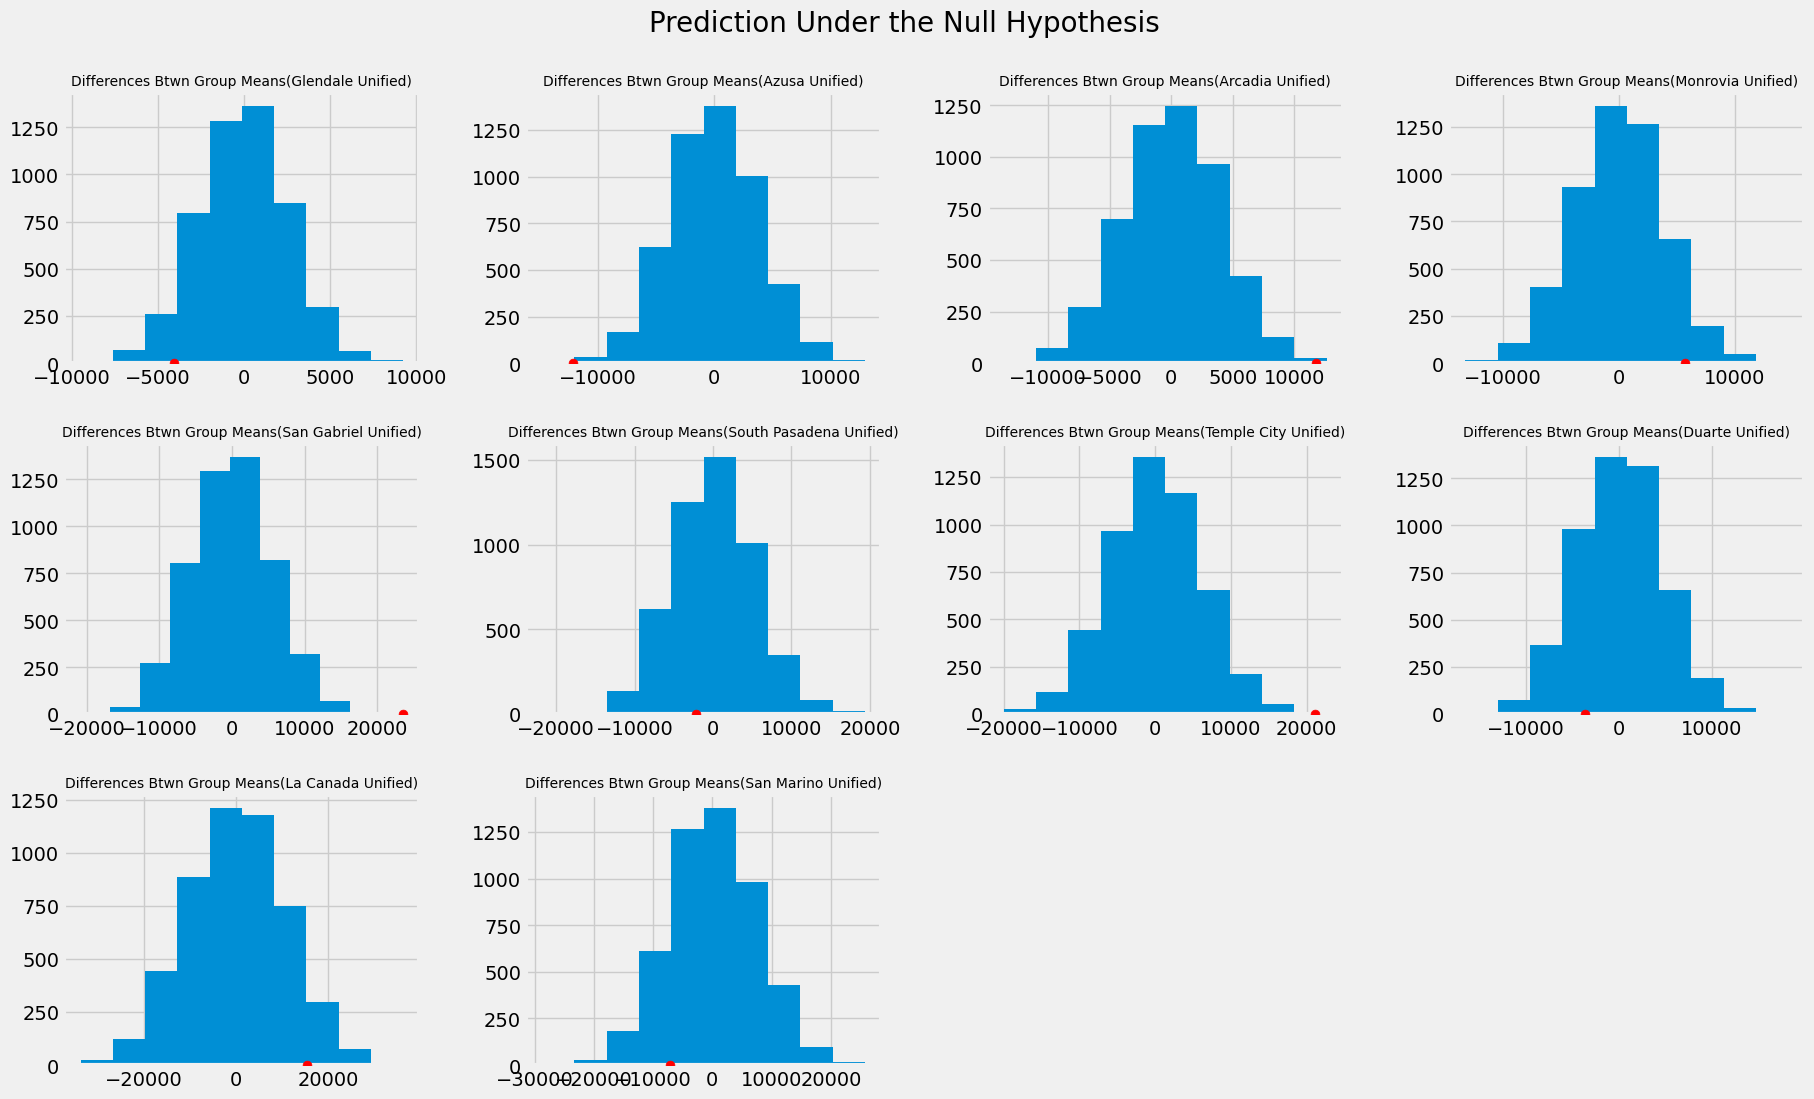

In [ ]:
# plot the results of the A/B tests btwn each of the non-PUSD districts and PUSD

plots.figure(figsize=(20,12))
plots.subplots_adjust(hspace=0.5, wspace=0.5)
plots.suptitle("Prediction Under the Null Hypothesis", fontsize=20, y=0.95)

for n in range(len(sim_diffs_btwn_districts)):
  # add a new subplot iteratively
  ax = plots.subplot(3, 4, n+1)
  district_hist_df = pd.DataFrame()
  district_hist_df[f'Differences Btwn Group Means({non_PUSD_districts[n]})'] = sim_diffs_btwn_districts[non_PUSD_districts[n]]
  district_hist_df.hist(ax=ax)
  plots.scatter(district_conclusions[f'{non_PUSD_districts[n]}'][0], 0, color='red', s=40, zorder=3)
  ax.title.set_size(10)

In [ ]:
district_result_cols = ['Salary_Difference', 'p-value','Favors_Alt_Hyp', 'Is_Stat_Sig' ]
compare_to_PUSD_by_district_df = pd.DataFrame.from_dict(district_conclusions, orient='index', columns=district_result_cols)
compare_to_PUSD_by_district_df

,Salary_Difference,p-value,Favors_Alt_Hyp,Is_Stat_Sig
Glendale Unified,-4089.196831,0.0590,True,False
Azusa Unified,-12092.092903,0.0010,True,True
Arcadia Unified,11814.354673,0.9984,False,True
Monrovia Unified,5678.103505,0.9286,False,False
San Gabriel Unified,23572.147289,1.0000,False,True
South Pasadena Unified,-2143.010711,0.3422,True,False
Temple City Unified,21145.849659,0.9998,False,True
Duarte Unified,-3624.106865,0.2204,True,False
La Canada Unified,15445.818039,0.9270,False,False
San Marino Unified,-7157.211267,0.1564,True,False


In [ ]:
# determine which school districts have special education salaries that are significantly higher than Pasadena USD's.
sig_higher_than_PUSD_district = compare_to_PUSD_by_district_df.loc[(compare_to_PUSD_by_district_df.Favors_Alt_Hyp == True) & (compare_to_PUSD_by_district_df.Is_Stat_Sig == True)].index.tolist()
sig_higher_than_PUSD_district

['Azusa Unified']

Our analysis allows us to reject the null hypothesis (for some of the districts) and to infer that special education instructors in Pasadena Unified are earning significantly less than those in Azusa Unified.

However, in our dataset, we also notice that for some districts not only can we accept the null, but we can actually accept an alternative hypothesis that opposes the hypothesis proposed by PUSD. That is, the alternative hypothesis that special education instructors in Pasadena USD have a significantly higher salary than some neighboring districts.

In [ ]:
# determine which school districts have special education salaries that are significantly lower than Pasadena USD's.
sig_lower_than_PUSD_district = compare_to_PUSD_by_district_df.loc[(compare_to_PUSD_by_district_df.Favors_Alt_Hyp == False) & (compare_to_PUSD_by_district_df.Is_Stat_Sig == True)].index.tolist()
sig_lower_than_PUSD_district

['Arcadia Unified', 'San Gabriel Unified', 'Temple City Unified']

We see that the school districts with special education salaries that are significantly lower than Pasadena are Arcadia Unified, San Gabriel Unified and Temple City Unified.

**Part 3: Comparison of salaries between categories of Special Education professions in Pasadena USD and in the neighboring districts**

Now that we have looked at the Special Education salary differences between Pasadena USD and its neighbors, let's further investigate these differences by determining if there are some Special Education professionals who are paid significantly less in Pasadena USD than in neighboring districts. For example, hypothetically speaking, let's say that School Psychologists are generally paid a much higher salary than other SpEd team members. What if non-PUSD school districts have more Psychologists? In this case, even if the salaries of each Special Education team member is comparable between Pasadena USD and non-PUSD (i.e. Speech therapists in Pasadena are paid similarily than those in non-Pasadena districts), non-PUSD districts would have an overall higher salary average due to their higher number of Pyschologists. In this part of our analysis we will compare the salaries of each Special Education job title in Pasadena USD versus non-Pasadena USD (averaged across the districts).


As stated in Part 1, the prominent professions in Special Education, include: Psychologist, Special Day Class (SDC) Teacher, Speech-Language Pathologist (SLP), Occupational Therapist (OT), Resource Specialist (RSP) Teacher, and Behavior Specialists. Supporting these team members are the Assistants, Aides, ABA therapists/Registered Behavior Technicians (RBTs) and Interns. Because the supporting members generally do not have professional degrees (i.e. Master's degree and above), they are not paid as much as the primary Special Education professionals. For that reason, a new category will be made for them.


In [ ]:
# create a list containing the variations of Aides, Assistant, and Intern job titles
assistant = sped_salary_data[sped_salary_data['Job Title'].str.contains('As')].groupby('Job Title').count().index.tolist()
aide = sped_salary_data[sped_salary_data['Job Title'].str.contains('Aide')].groupby('Job Title').count().index.tolist()
instructional_aide = sped_salary_data[sped_salary_data['Job Title'].str.contains('I A')].groupby('Job Title').count().index.tolist()
instructional_aide2 = sped_salary_data[sped_salary_data['Job Title'].str.contains('I/A')].groupby('Job Title').count().index.tolist()
intern = sped_salary_data[sped_salary_data['Job Title'].str.contains('Intern')].groupby('Job Title').count().index.tolist()
aba = sped_salary_data[sped_salary_data['Job Title'].str.contains('Aba')].groupby('Job Title').count().index.tolist()
rbt = ['Registered Behavior Tech']

# turn the list into a set for aides, assistants, and interns to remove duplicates
asst = assistant + aide + intern + aba + rbt + instructional_aide + instructional_aide2
asst = set(asst)

asst

{'Behav Interventionist-Aba',
 'Behavior Intrv Aide',
 'Behavior Intrvention Asst',
 'Behavioral Instruct Aide',
 'I A Spec Ed I',
 'I A-One On One-Spec Ed',
 'Inst Aide Special Ed 1:1',
 'Inst Aide-Special Educ',
 'Inst Aide/Spec Ed',
 'Inst Aide/Special Ed./I',
 'Inst Asst Behavior',
 'Inst Asst Iii-Special Ed',
 'Inst Asst Iv-Special Ed',
 'Inst Asst/Special Ed',
 'Inst. Behavior Int. Asst.',
 'Inst.Aide Special Ed./Ii',
 'Inst.Aide Special Ed./Iii',
 'Instr Aide- Spec Educ',
 'Instr Asst-Special Ed',
 'Instructional Assistant - Special Education',
 'Instructional Assistant - Special Education - Hourly',
 'Lead Intsv.Behav.Inst.Ast',
 'Occupational Therap Asst',
 'Occupational Therapy Assistant',
 'Proj.Aide I/Behav.Assist',
 'Proj.Aide Ii/Behav.Assist',
 'Psych Intern',
 'Psych Intern Unclassified',
 'Registered Behavior Tech',
 'Speech & Lang. Path. Asst',
 'Speech Lang Path Asst',
 'Speech Lang Patholog Asst',
 'Speech Lang. Path. Assist',
 'Speech Language Pathologist Assistant'

Now that we have a list containing the variations of job titles for each job position, let's create a new column containing a standard name representing all the variations for each job position.

In [ ]:
SpEd_team = ['Asst', 'Psych', 'RSP', 'SDC', 'SLP', 'OT', 'Behavior']

# create a function that provides the standard job title based on the title given in the table
def std_job_title(job_title):
  if job_title in asst:
    return 'Asst'
  elif job_title in psych:
    return 'Psych'
  elif job_title in rsp:
    return 'RSP'
  elif job_title in sdc:
    return 'SDC'
  elif job_title in slp:
    return 'SLP'
  elif job_title in ot:
    return 'OT'
  else:
    return 'Behavior'

# create a Series with standard job title labels
job_titles = sped_salary_above_min_wage['Job Title'].apply(std_job_title).rename("Std_Job_Title")

# add job_titles to sped_salary_above_min_wage
std_sped_salary_data = pd.concat([sped_salary_above_min_wage, job_titles], axis = 1)
std_sped_salary_data

,Job Title,Total Pay,Agency,is_PUSD,Std_Job_Title
72,Psychologist,125345.13,Pasadena Unified,True,Psych
74,Psychologist,130070.13,Pasadena Unified,True,Psych
87,Teacher-Special Ed,122838.87,Pasadena Unified,True,SDC
94,Resource Teacher,121998.66,Pasadena Unified,True,RSP
118,Psychologist,116580.12,Pasadena Unified,True,Psych
...,...,...,...,...,...
446,Behavior Intrv Aide,30482.12,Temple City Unified,False,Asst
449,Behavior Intrv Aide,30075.85,Temple City Unified,False,Asst
450,Behavior Intrv Aide,29926.58,Temple City Unified,False,Asst
453,Behavior Intrv Aide,29979.52,Temple City Unified,False,Asst


Let's perform an A/B test between Pasadena USD and neighboring districts (as a whole) by job title.

In [ ]:
# collect the statistics for each of job title in a comparison btwn PUSD and non-PUSD districts
sim_diffs_for_job_title = {}
job_conclusions = {}

for team_member in SpEd_team:

  # creates a dataframe with only one non-PUSD districts and PUSD
  compare_jobs_df = std_sped_salary_data[std_sped_salary_data['Std_Job_Title'] == team_member]

  # adds to the list of observed test statistics for the non-PUSD districts
  obs_diff_btwn_jobs = difference_of_means(compare_jobs_df, 'Total Pay', 'is_PUSD')
  job_conclusions[f'{team_member}'] = [obs_diff_btwn_jobs]

  # adds simulated difference values to the sim_diffs dictionary
  num_of_simulations = 5000
  one_sim_diff_for_job = bootstrap_differences(compare_jobs_df, 'Total Pay', 'is_PUSD', num_of_simulations)
  sim_diffs_for_job_title[f'{team_member}'] = one_sim_diff_for_job

  # adds p-values to district_p_vals dictionary
  one_job_p_val = calc_p(one_sim_diff_for_job, obs_diff_btwn_jobs, num_of_simulations)
  job_conclusions[f'{team_member}'] += [one_job_p_val]

  # adds alt hypothesis and stat sig decisions to district_conclusions dictionary
  job_title_alt_hyp = accept_alternative_hyp(obs_diff_btwn_jobs, one_job_p_val)
  job_conclusions[f'{team_member}'] += [job_title_alt_hyp[0]]
  job_conclusions[f'{team_member}'] += [job_title_alt_hyp[1]]

job_conclusions

{'Asst': [-3742.3692095754304, 0.0, True, True],
 'Psych': [-1552.5493371996708, 0.4082, True, False],
 'RSP': [20463.364926108377, 1.0, False, True],
 'SDC': [-8796.62246955109, 0.0018, True, True],
 'SLP': [-14337.679999999993, 0.1176, True, False],
 'OT': [-2847.577321428558, 0.3396, True, False],
 'Behavior': [-19649.788, 0.0908, True, False]}

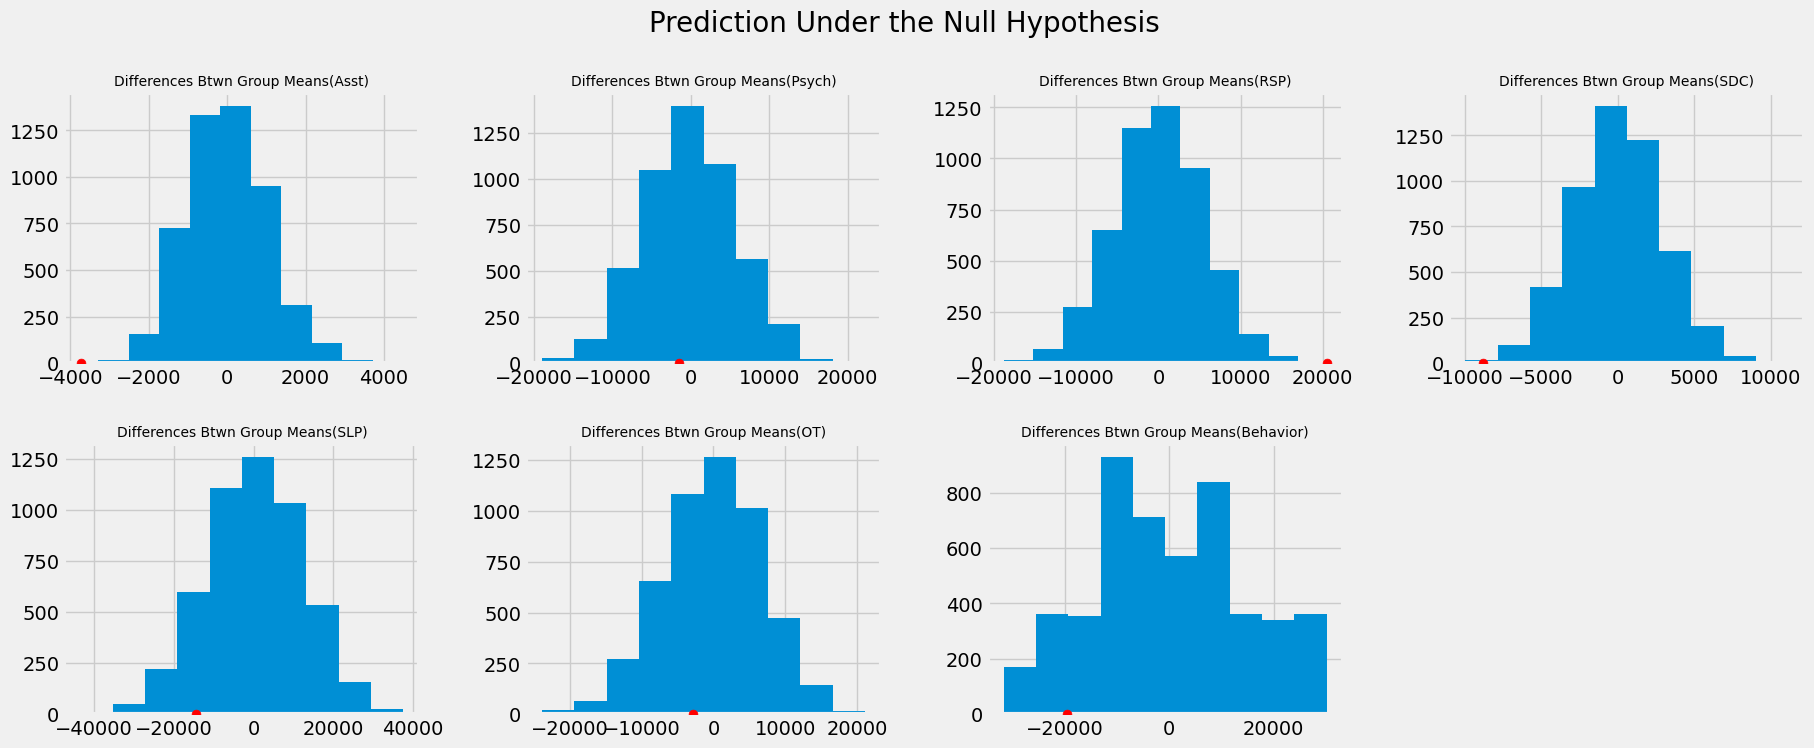

In [ ]:
# plot the results of the A/B tests for each job category btwn PUSD and non-PUSD districts (averaged)

plots.figure(figsize=(20,12))
plots.subplots_adjust(hspace=0.5, wspace=0.5)
plots.suptitle("Prediction Under the Null Hypothesis", fontsize=20, y=0.95)

for j in range(len(sim_diffs_for_job_title)):
  # add a new subplot iteratively
  ax = plots.subplot(3, 4, j+1)
  job_hist_df = pd.DataFrame()
  job_hist_df[f'Differences Btwn Group Means({SpEd_team[j]})'] = sim_diffs_for_job_title[SpEd_team[j]]
  job_hist_df.hist(ax=ax)
  plots.scatter(job_conclusions[f'{SpEd_team[j]}'][0], 0, color='red', s=40, zorder=3)
  ax.title.set_size(10)


In [ ]:
job_result_cols = ['Salary_Difference', 'p-value','Favors_Alt_Hyp', 'Is_Stat_Sig' ]
PUSD_v_nonPUSD_by_job_compare = pd.DataFrame.from_dict(job_conclusions, orient='index', columns=job_result_cols)
PUSD_v_nonPUSD_by_job_compare

,Salary_Difference,p-value,Favors_Alt_Hyp,Is_Stat_Sig
Asst,-3742.369210,0.0000,True,True
Psych,-1552.549337,0.4082,True,False
RSP,20463.364926,1.0000,False,True
SDC,-8796.622470,0.0018,True,True
SLP,-14337.680000,0.1176,True,False
OT,-2847.577321,0.3396,True,False
Behavior,-19649.788000,0.0908,True,False


In [ ]:
# determine which special education instructors have significantly lower salaries in PUSD compared to non-PUSD districts
sig_higher_than_PUSD_job = PUSD_v_nonPUSD_by_job_compare.loc[(PUSD_v_nonPUSD_by_job_compare.Favors_Alt_Hyp == True) & (PUSD_v_nonPUSD_by_job_compare.Is_Stat_Sig == True)].index.tolist()
sig_higher_than_PUSD_job

['Asst', 'SDC']

In [ ]:
# determine which special education instructors have significantly higher salaries in PUSD compared to non-PUSD districts
sig_lower_than_PUSD_job = PUSD_v_nonPUSD_by_job_compare.loc[(PUSD_v_nonPUSD_by_job_compare.Favors_Alt_Hyp == False) & (PUSD_v_nonPUSD_by_job_compare.Is_Stat_Sig == True)].index.tolist()
sig_lower_than_PUSD_job

['RSP']

From our analysis, we can see that Assistants/Aides/Interns and SDC teachers are paid significantly less in Pasadena USD compared to their counterparts in non-Pasadena districts. However, we also see that RSP teachers in Pasadena are paid significantly more than RSP teachers in the neighboring districts.

**Results:**

* Part 1: After organizing the data (e.g. excluding salaries lower than the yearly salary on minimum wage) and implementing A/B testing between the average of special education instructors in Pasadena school district and the average across comparable neighboring school districts, we found that the salaries in Pasadena are significantly lower.

* Part 2: Using the same methodology for Part 1, we found that special education salaries are significantly lower in Pasadena USD when comparing to Azusa USD. However, Pasadena USD salaries in special education are significantly higher than those in Arcadia USD, San Gabriel USD, and Temple City USD.

* Part 3: We applied the same methodology in the previous parts of this study to investigate if there salary differences between Pasadena USD and non-Pasadena USD districts for each special education team member (e.g. Psychologist, SLP, SDC teacher, etc.). Results indicated that RSP teachers in Pasadena USD have significantly higher salaries than those in neighboring districts, whereas Assistants/Aides and SDC teachers have significantly lower salaries.

**Conclusions & Further Directions:**

* The results of this study suggest that the claim that Pasadena USD educators earn less than those in neighboring districts is limited to Special Day Class teachers and Assistants. This suggests that when the journalist wrote "especially for Special Education teachers", he was probably referring only to the teachers, not the whole Special Education team.
* In the article, Gardner made the claim that Pasadena USD has "had dozens of teachers just leaving even since the beginning of this year". Perhaps the discrepancy between our results and the statements of PUSD educators is due to the fact that this analysis was based on a dataset with the minimum salary of an individual who worked the entire year. If Gardner's claims are true, it would make sense that the Pasadena USD salaries on average would be lower compared to neighboring districts, since there would be a large number of short-term salaries which are generally lower than full-time salaries. At the time of this analysis, 2022 salary was not available for all of the districts of interest. Future investigations can look into the turnover rates between PUSD and non-PUSD districts by comparing the list of employees in 2021 and those in 2022.